# Credit Card Customer Data

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from siuba import *
from siuba.dply.vector import *

In [74]:
data = pd.read_csv("C:/Users/solk1/OneDrive/Desktop/Ciencia de datos/pruebas_ML/datos/Credit Card Customer Data.csv")
data = data.rename(columns = {"Customer Key":"Customer_Key"})
data.head()

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [25]:
data.info()  #Quitar las columnas si_no y cutomer key, debido a que son identificadores

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer_Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [62]:
data[data["Customer_Key"].duplicated()]  
#Hay valores de Customer_Key iguales, por ahora los dejaré, aunque sin problemas se puede eliminar

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


In [67]:
#data["Customer_Key"] = data["Customer_Key"].drop_duplicates()
#data[data["Customer_Key"].duplicated()]

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Customer_key
332,333,47437,17000,7,3,1,0,NaN
398,399,96929,67000,6,2,2,2,NaN
432,433,37252,59000,6,2,1,2,NaN
541,542,50706,60000,7,5,2,2,NaN
632,633,97935,187000,7,1,7,0,NaN


In [69]:
#data = data.dropna()

Ahora sí, veamos algunas gráficas:

In [76]:
data = data.drop(["Sl_No", "Customer_Key"], axis = 1)

In [98]:
data1 = data >> group_by(_.Total_Credit_Cards) >> summarize(Total = _.Total_Credit_Cards.count())
data1

,Total_Credit_Cards,Total
0,1,59
1,2,64
2,3,53
3,4,151
4,5,74
5,6,117
6,7,101
7,8,11
8,9,11
9,10,19


In [99]:
fig = px.pie(data1, values = "Total", names = "Total_Credit_Cards", title = "Total tarjertas de crédito")
fig.show()

In [97]:
data2 = data >> group_by(_.Total_visits_bank) >> summarize(Total = _.Total_visits_bank.count())
fig = px.pie(data2, values = "Total", names = "Total_visits_bank", title = "Total de visitas al banco")
fig.show()

In [100]:
fig = px.bar(data2, x = "Total_visits_bank", y = "Total")
fig.show()

In [102]:
data.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

<AxesSubplot:xlabel='Total_Credit_Cards', ylabel='Total_calls_made'>

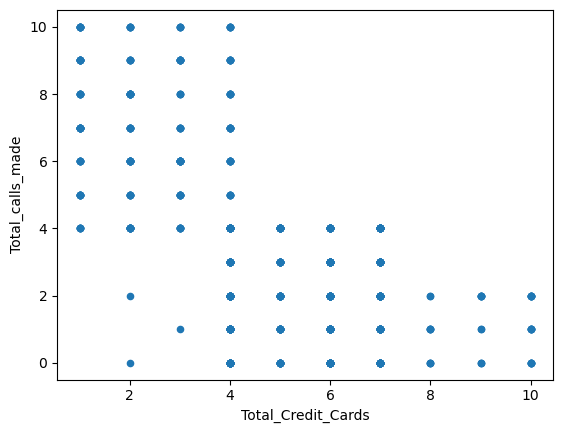

In [110]:
#Viendo diferentes gráficas, parece que con 3 grupos es suficiente
data.plot.scatter(x = "Total_Credit_Cards", y = "Total_calls_made")  

C:\Users\solk1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



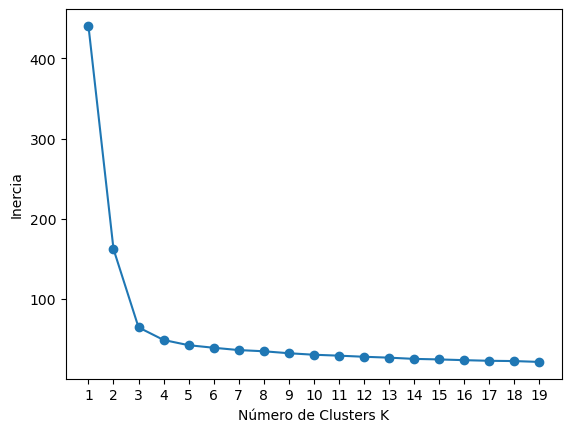

In [133]:
from sklearn.cluster import KMeans
ks = range(1, 20) #Cantidad de clusters a variar y probar, entre 1 y 20
inercia = []

for i in ks:

    modelo = KMeans(n_clusters = i)  #Crear un instancia de KMeans, con el número de cluster igual al propuesto en cada iteración

    modelo.fit(dataf)      #Entrenar el modelo con los datos ya escalados

    inercia.append(modelo.inertia_)  #Añadimos el atributo de incercia del modelo a la lista

plt.plot(ks, inercia, "-o")
plt.xlabel("Número de Clusters K")
plt.ylabel("Inercia")
plt.xticks(ks)
plt.show()
#La incercia va disminuyendo, pero hay que encontrar en donde la incercia tiene un cambio de comportamiento
#Queremos que los cluster estén lo más separados posibles.
#En este caso, el cambio mayor de comportamiento la encontramos con una cantidad de clusters entre 2 y 3

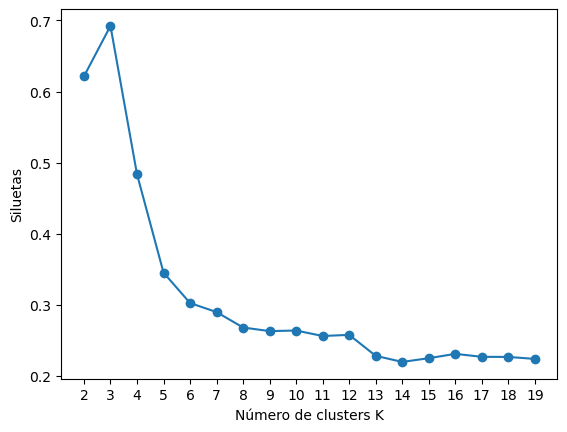

In [134]:
#Ahora, usando el valor de la silueta (valor entre -1 y +1)
#Indica la similitud de cada dato con su mismo cluster, pero comparado con otros clusters
#A mayor valor de la silueta, mejor resultado de cohesión
from sklearn.metrics import silhouette_score 
ks = range(2, 20)
siluetas = []
for i in ks:
    clusterer = KMeans(n_clusters = i)  #Se crea la instancia de KMeans (en donde varia la cantidad de clusters)
    preds = clusterer.fit_predict(dataf)  #Se hace la predicción con los datos escalados
    score = silhouette_score(dataf, preds, metric = "euclidean")  #Verificar el valor de la silueta
    siluetas.append(score)
    
plt.plot(ks, siluetas, "-o")
plt.xlabel("Número de clusters K")
plt.ylabel("Siluetas")
plt.xticks(ks)
plt.show()
#Los valores más altos de siluetas están con el número de clusters 3 

In [183]:
#Para el modelo:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [184]:
columnas = data.columns

In [185]:
data_scaler = scaler.fit_transform(data)
dataf = pd.DataFrame(data_scaler, columns = columnas)

In [186]:
dataf.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.492386,0.111111,0.2,0.066667,0.0
1,0.238579,0.222222,0.0,0.666667,0.9
2,0.238579,0.666667,0.2,0.200000,0.4
3,0.137056,0.444444,0.2,0.066667,0.4
4,0.492386,0.555556,0.0,0.800000,0.3


In [187]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)

In [188]:
modelo = kmeans.fit(dataf.values)

In [189]:
modelo.cluster_centers_

array([[0.15630562, 0.5018759 , 0.69922078, 0.06545455, 0.19948052],
       [0.04697124, 0.15802469, 0.18666667, 0.23614815, 0.68577778],
       [0.70071066, 0.86      , 0.12      , 0.72666667, 0.108     ]])

In [190]:
modelo.transform(dataf.values)

array([[0.74475656, 0.83653327, 1.0285416 ],
       [1.19418101, 0.55400048, 1.12498465],
       [0.58434303, 0.61529138, 0.78739159],
       ...,
       [0.96935345, 1.14623604, 0.17225855],
       [1.37938627, 1.55576817, 0.37023445],
       [1.27885406, 1.31907217, 0.21550274]])

In [191]:
dataf["Predicción"] = modelo.labels_
dataf.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Predicción
0,0.492386,0.111111,0.2,0.066667,0.0,0
1,0.238579,0.222222,0.0,0.666667,0.9,1
2,0.238579,0.666667,0.2,0.200000,0.4,0
3,0.137056,0.444444,0.2,0.066667,0.4,1
4,0.492386,0.555556,0.0,0.800000,0.3,2


In [192]:
dataf.groupby("Predicción")["Predicción"].count()

Predicción
0    385
1    225
2     50
Name: Predicción, dtype: int64

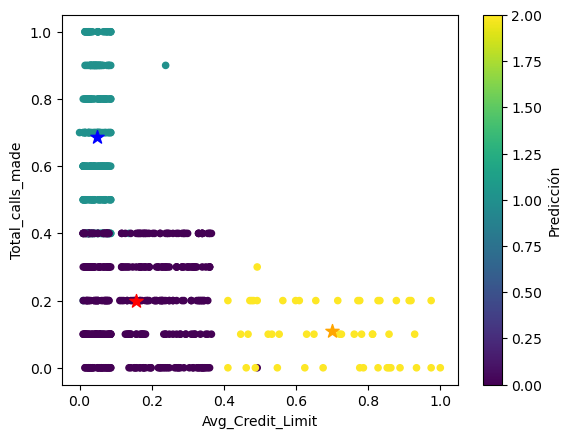

In [195]:
columna1 = 1
columna2 = 5
dataf.plot.scatter(x = dataf.columns[columna1-1], y = dataf.columns[columna2-1], 
                    c = "Predicción", colormap='viridis')

colores = ["red", "blue", "orange"]  #Porque indique 3 grupos
for i in range(len(modelo.cluster_centers_)):
    plt.scatter(x = [modelo.cluster_centers_[i][columna1-1]], y = [modelo.cluster_centers_[i][columna2-1]],
               color = colores[i], marker = "*", s = 100)

In [169]:
import dash
from dash import html
from dash import dcc

from dash.dependencies import Input, Output
import plotly.express as px

In [196]:
dataf["Predicción"] = dataf["Predicción"].astype("string")

In [197]:
app = dash.Dash()

app.layout = html.Div([
    html.Div([ dcc.Dropdown(id = "dropx", options = [{"label":i,  "value":i} for i in dataf.columns[:-1]], 
                 value = "Avg_Credit_Limit")], style = {"width": "45%", "display":"inline-block"}),
   
    html.Div([ dcc.Dropdown(id = "dropy", options = [{"label":i,  "value":i} for i in dataf.columns[:-1]], 
                 value = "Total_Credit_Cards")], style = {"width": "45%", "display":"inline-block", "float":"right"}),
    
    html.Div([
        dcc.Graph(id = "plot1")
    ])
])

@app.callback(
    Output("plot1", "figure"),
    [Input("dropx", "value"), Input("dropy", "value")]
)
def actualizar_plot(ejex, ejey):
    
    fig = px.scatter(dataf, x = ejex, y = ejey, color = "Predicción")
    return fig

if __name__ == "__main__":
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
